In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn import metrics

In [3]:
df = pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/DATASET/BAC.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,16.450001,16.490000,16.25,16.43,14.360278,114888000
1,2016-01-05,16.520000,16.590000,16.23,16.43,14.360278,66670000
2,2016-01-06,16.190001,16.290001,16.02,16.08,14.054366,102760800
3,2016-01-07,15.730000,15.900000,15.44,15.50,13.547432,116255900
4,2016-01-08,15.940000,15.940000,15.16,15.20,13.285223,124782400


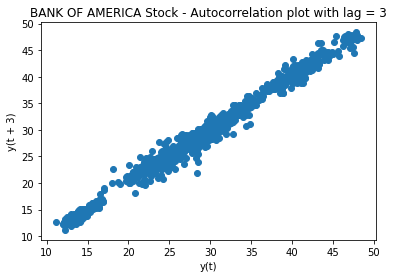

In [4]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('BANK OF AMERICA Stock - Autocorrelation plot with lag = 3')
plt.show()

In [5]:
int(len(df)*0.7)

1057

In [6]:
df.shape

(1510, 7)

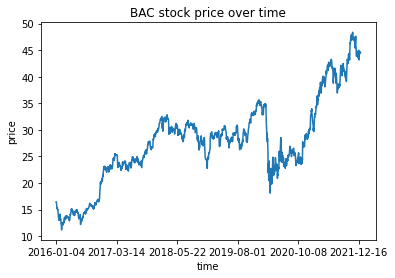

In [7]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1510, 300), df['Date'][0:1510:300])
plt.title("BAC stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [8]:
# divide the data into a training (70%) and test (30%) set.
#p=4, d=1, q=0
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [12]:
MAE_error = metrics.mean_absolute_error(test_data, model_predictions)
RMSE_error = np.sqrt(metrics.mean_squared_error(test_data, model_predictions))
MSE_error = metrics.mean_squared_error(test_data, model_predictions)
R2_score = metrics.r2_score(test_data, model_predictions)
print("Testing R2 score  is {}".format(R2_score))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))
print('Testing Root Mean Squared Error is {}'.format(RMSE_error))

Testing R2 score  is 0.9930718244759676
Testing Mean Squared Error is 0.5000289586744312
Testing Mean Absolute Error is 0.5390654249140381
Testing Root Mean Squared Error is 0.707127257765129


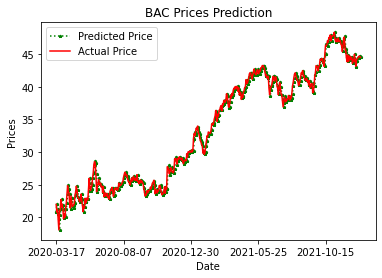

In [11]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='green', marker='*',markersize=3, linestyle='dotted',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('BAC Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1057,1510,100), df.Date[1057:1510:100])
plt.legend()
plt.show()

In [15]:
arr = np.array(model_predictions)
print(arr)

[20.82697456 21.98429655 20.56140305 21.25130887 19.7788447  18.07386228
 20.30768858 21.30875594 22.88662498 21.86435913 21.96618135 21.25779012
 19.89500586 20.20423614 20.11296101 21.28151953 22.16404559 23.54238076
 24.9083894  24.27881597 23.64199932 22.16152266 21.31587819 22.90766475
 22.90613309 21.8043297  21.49618442 21.87549295 22.22375155 23.37495749
 24.03185726 24.81595959 24.17424052 23.09893475 22.70740275 22.66405115
 22.40809161 22.74926889 23.56838199 22.81984195 21.81850832 20.75630246
 21.54580393 21.56972943 22.87624002 22.39395578 22.83631626 22.84708798
 22.76963994 24.03172285 26.03089085 25.27487712 24.01326869 24.31263171
 24.9126853  25.98362918 26.81581427 28.12722338 28.62030563 28.29883548
 26.60282439 23.85047863 24.39441836 25.30278736 26.06142087 25.06060752
 24.93027086 25.17260476 24.75515534 24.71106256 23.86972572 24.60196265
 23.34609723 23.28783377 23.64693898 23.47447577 23.22038441 23.59518356
 23.1434896  23.02654697 22.76256128 23.93750062 24

In [13]:
df = pd.DataFrame(arr, columns =['Open'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Open
0,20.826975
1,21.984297
2,20.561403
3,21.251309
4,19.778845
...,...
448,44.438342
449,44.456387
450,44.566089
451,44.705836


In [14]:
df.to_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_BAC.csv",index=None)
df.head(5)

,Open
0,20.826975
1,21.984297
2,20.561403
3,21.251309
4,19.778845
